# Notebook for Eigenvector Centrality (2000-2020)

In [2]:
#Import all libraries used in notebooks
import pandas as pd
from scipy import stats
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import matplotlib.patches as mpatches

## Import Data

In [3]:
#Load data, correlation and indicator list saved before
CleanDataAllGoals=pd.read_pickle('CleanDataAllGoals')
CorrelationAllGoals=pd.read_pickle('CorrelationAllGoals')

with open(r'/Users/bkemp/Data Science/Project/IndicatorList.ob','rb') as fp:
        IndicatorList= pickle.load(fp)

In [48]:
#View correlation matrix
CorrelationAllGoals

['SI_POV_DAY1--',
 'SI_POV_EMP1--25+_BOTHSEX_',
 'SI_POV_EMP1--15+_BOTHSEX_',
 'SI_POV_EMP1--15+_FEMALE_',
 'SI_POV_EMP1--25+_FEMALE_',
 'SI_POV_EMP1--15-24_MALE_',
 'SI_POV_EMP1--15+_MALE_',
 'SI_POV_EMP1--25+_MALE_',
 'SI_POV_EMP1--15-24_BOTHSEX_',
 'SI_POV_EMP1--15-24_FEMALE_',
 'SP_ACS_BSRVH2O--URBAN_',
 'SP_ACS_BSRVH2O--RURAL_',
 'SP_ACS_BSRVH2O--ALLAREA_',
 'SP_ACS_BSRVSAN--RURAL_',
 'SP_ACS_BSRVSAN--ALLAREA_',
 'SP_ACS_BSRVSAN--URBAN_',
 'VC_DSR_AFFCT--',
 'VC_DSR_DAFF--',
 'VC_DSR_IJILN--',
 'VC_DSR_MISS--',
 'VC_DSR_MMHN--',
 'VC_DSR_MORT--',
 'VC_DSR_MTMP--',
 'VC_DSR_PDAN--',
 'VC_DSR_PDYN--',
 'VC_DSR_AGLH--',
 'VC_DSR_CILN--',
 'VC_DSR_DDPA--',
 'VC_DSR_GDPLS--',
 'VC_DSR_HOLH--',
 'VC_DSR_LSGP--',
 'SD_XPD_ESED--',
 'SN_ITK_DEFC--',
 'SN_ITK_DEFCN--',
 'SH_STA_STNTN--<5Y_',
 'SN_STA_OVWGTN--<5Y_',
 'SH_STA_ANEM--15-49_FEMALE_',
 'SH_STA_ANEM_NPRG--15-49_FEMALE_',
 'SH_STA_ANEM_PREG--15-49_FEMALE_',
 'ER_GRF_PLNTSTOR--',
 'ER_RSK_LBREDS--',
 'AG_PRD_AGVAS--A_',
 'AG_PRD_OR

## Calculate Centrality

In [51]:
#Function to create network and perform eigenvector centrality
def cent(corData):
    
    #Create Empty network Graphs for positive correlation and negative correlation
    Hplus=nx.Graph()
    Hminus=nx.Graph()
    
    #Get correlation matrix values (which with be the edges)
    netval=corData.values
    
    #Get correlation seriescode (which will be the nodes)
    netNode=list(corData.index.get_level_values(2))
        
    #Create positive (Synergy) network from values greater than 0.6
    for m in range(0,len(netNode)):
        for n in range(1+m,len(netNode)):
            if netval[m,n]>0.6:
                Hplus.add_edge(netNode[m],netNode[n],weight=netval[m,n])
   
    #Create Negative (Trade-off) Network from values less than -0.6
    for m in range(0,len(netNode)):
        for n in range(1+m,len(netNode)):
            if netval[m,n]<-0.6:
                Hminus.add_edge(netNode[m],netNode[n],weight=abs(netval[m,n]))#Absolute used as centrality of negative values not well documented
    
    #Perform eigenvector centrality, using weight as edges between nodes (Correlation)
    HplusCen = nx.eigenvector_centrality(Hplus,weight='weight',max_iter=1000,tol=1e-6)
    HminusCen = nx.eigenvector_centrality(Hminus,weight='weight',max_iter=1000,tol=1e-6)
  
    
    return Hplus, Hminus, HplusCen, HminusCen

In [52]:
# Get out positive network, negative network, positive (Synergy) correlation centrality and negative (Trade-off) correlation centrality
posNtwk, negNtwk, posCen, negCen = cent(CorrelationAllGoals)

In [8]:
#Combing centrality results
pCen=pd.DataFrame(posCen.items(),columns=['SeriesCode', 'Synergy Eigenvector Centrality'])
nCen=pd.DataFrame(negCen.items(),columns=['SeriesCode', 'Tradeoff Eigenvector Centrality'])
centOVR=pd.merge(pCen,nCen,on='SeriesCode')

In [9]:
#Saving Centrality to pickle
centOVR.to_pickle('BrazilEigenvectorCentralityAllGoals')

In [10]:
#Loading Centrality from pickle
centOVR=pd.read_pickle('BrazilEigenvectorCentralityAllGoals')

### Synergy Eigenvector Centrality

In [53]:
#Sorting synergies into top 5
centOVR.sort_values('Synergy Eigenvector Centrality',ascending=False).iloc[:5,[0,1]]
#centOVR.sort_values('Synergy Eigenvector Centrality',ascending=True).iloc[:10,:]

,SeriesCode,Synergy Eigenvector Centrality
262,GB_POP_SCIERD--,0.067000
18,SN_ITK_DEFCN--,0.066981
85,SE_TOT_CPLR--LOWSEC_URBAN_Q2_BOTHSEX_,0.066895
55,SE_TOT_CPLR--UPPSEC_URBAN_Q3_BOTHSEX_,0.066824
47,SE_TOT_CPLR--LOWSEC_ALLAREA_Q1_MALE_,0.066810


### Tradeoff Eigenvector Centrality

In [40]:
#Sorting tradeoffs into top 5
centOVR.sort_values('Tradeoff Eigenvector Centrality',ascending=False).iloc[:5,:]
#centOVR.sort_values('Tradeoff Eigenvector Centrality',ascending=True).iloc[:10,:]

,SeriesCode,Synergy Eigenvector Centrality,Tradeoff Eigenvector Centrality
388,EN_ATM_GHGT_NAIP--,0.000008,0.068376
434,SE_AWP_CPRA--LOWSEC_ALLAREA__T_MALE_,0.000006,0.067794
436,SE_AWP_CPRA--LOWSEC_ALLAREA__T_FEMALE_,0.000006,0.067378
411,SE_ALP_CPLR--LOWSEC__T_BOTHSEX_,0.000006,0.067362
437,SE_AWP_CPRA--UPPSEC_URBAN__T_MALE_,0.000006,0.067328


# Exploring Eigenvector Centrality

#### Line charts

In [14]:
#Setting colour and labels for synergy and trade-off network centrality
synergyLabel = mpatches.Patch(color='green', label='Synergy Network')
tradeoffLabel = mpatches.Patch(color='red', label='Tradeoff Network')

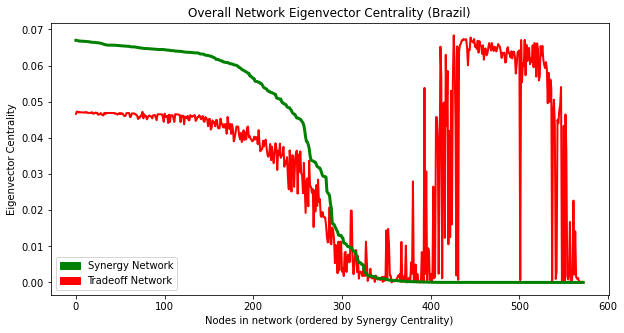

In [54]:
#Setting data for synergy network ordered by synergy centrality
xD = centOVR.sort_values('Synergy Eigenvector Centrality',ascending=False).iloc[:,[1]].values
#Setting data for trade-off network also order by synergy centrality
yD= centOVR.sort_values('Synergy Eigenvector Centrality',ascending=False).iloc[:,[2]].values
#Setting number of nodes present
tD = range(0,len(xD))

#Plotting Figure
plt.figure(figsize=(10,5))
plt.plot(tD,yD,color='red',linewidth=2) #Plot trade-off line
plt.plot(tD,xD,color='green',linewidth=3) #Plot synergy line
plt.title('Overall Network Eigenvector Centrality (Brazil)')
plt.xlabel('Nodes in network (ordered by Synergy Centrality)')
plt.ylabel('Eigenvector Centrality')
plt.legend(handles=[synergyLabel,tradeoffLabel])
plt.show()

### Plotting Network

In [17]:
corrmat = CorrelationAllGoals.copy()

In [18]:
#Creating Base Network to get position of all nodes
G=nx.Graph()
 
corrmat=CorrelationAllGoals.copy() 
#Threshold to keep for correlation (0.6)
threshold=input('Enter Threshold to Use: ')

#Get correlation matrix values (edges)
netval=corrmat.values
    
#Get correlation names (nodes)
netNode=list(corrmat.index.get_level_values(2))

#Add nodes and their edges
for m in range(0,len(netNode)):
        for n in range(1+m,len(netNode)):
            if netNode[m]!=netNode[n]: #Don't need to add self-correlation so skip nodes correlated with themselves
                if netval[m,n]>float(threshold): #Only add nodes in synergy network > threshold
                    G.add_edge(netNode[m],netNode[n],weight=netval[m,n])

Enter Threshold to Use: 0.6


In [6]:
#Getting node layout, using weight so nodes are closer together if they are more correlated, k = optimal distance between nodes
#set to k=0.75 so there is decent spacing and nodes are not completely covering each other
posAll=nx.spring_layout(G,weight='weight',k=0.75)

In [16]:
#Saving node layout as it is not the exact same orientation everytime and want to be able to compare
with open('BrazilNetworkPos.pickle', 'wb') as handle:
    pickle.dump(posAll, handle, protocol=pickle.HIGHEST_PROTOCOL)
#Loading node layout
with open('BrazilNetworkPos.pickle', 'rb') as handle:
    posAll = pickle.load(handle)

In [22]:
#Setting network for key eigenvector node and its connections
inputNode = input('Enter Node to use as point: ') #Key node you want to show
#Synergy Network
SynNet=nx.Graph()

#Get correlation matrix values (edges)
netval=corrmat.values

#Get correlation names (nodes)
netNode=list(corrmat.index.get_level_values(2))

#Add nodes and edges
for m in range(0,len(netNode)):
        for n in range(1+m,len(netNode)):
            if netNode[m]!=netNode[n]:#Don't want nodes correlated with themselves
                if netNode[m]==inputNode or netNode[n]==inputNode: #Only add connections for the key node
                    if netval[m,n]>0.6: # Only take values above threshold
                        SynNet.add_edge(netNode[m],netNode[n],weight=abs(netval[m,n]))

Enter Node to use as point: GB_POP_SCIERD--


#### Setting Nodes and Colours

In [55]:
#List for indicators split into goals 1-17
lists=IndicatorList
#Not all Nodes in the list are used in the network (no connection or not enough data so this extracts only nodes
#in the network)
NodesInSynNet = list(SynNet.nodes) #Gets nodes connected to key node
SynNodes = []

# Creates a list of nodes in key node network split into lists based on the goal
#Output is list of lists, with list 1 being goal 1 containing only nodes in goal 1 connected to the key node
for x in range(0,len(lists)):
    MatchingSyn=set(lists[x])&set(NodesInSynNet)
    SynNodes.append(MatchingSyn)

In [24]:
#Setting colours of indicators as chosen by the UN (colour codes found from UN documentation online)
Goal1_colour = '#E5243B'
Goal2_colour = '#DDA63A'
Goal3_colour = '#4C9F38'
Goal4_colour = '#C5192D'
Goal5_colour = '#FF3A21'
Goal6_colour = '#26BDE2'
Goal7_colour = '#FCC30B'
Goal8_colour = '#A21942'
Goal9_colour = '#FD6925'
Goal10_colour = '#DD1367'
Goal11_colour = '#FD9D24'
Goal12_colour = '#BF8B2E'
Goal13_colour = '#3F7E44'
Goal14_colour = '#0A97D9'
Goal15_colour = '#56C02B'
Goal16_colour = '#00689D'
Goal17_colour = '#19486A'

In [25]:
#Setting Legend
Goal1_patch = mpatches.Patch(color=Goal1_colour, label='Goal 1')
Goal2_patch = mpatches.Patch(color=Goal2_colour, label='Goal 2')
Goal3_patch = mpatches.Patch(color=Goal3_colour, label='Goal 3')
Goal4_patch = mpatches.Patch(color=Goal4_colour, label='Goal 4')
Goal5_patch = mpatches.Patch(color=Goal5_colour, label='Goal 5')
Goal6_patch = mpatches.Patch(color=Goal6_colour, label='Goal 6')
Goal7_patch = mpatches.Patch(color=Goal7_colour, label='Goal 7')
Goal8_patch = mpatches.Patch(color=Goal8_colour, label='Goal 8')
Goal9_patch = mpatches.Patch(color=Goal9_colour, label='Goal 9')
Goal10_patch = mpatches.Patch(color=Goal10_colour, label='Goal 10')
Goal11_patch = mpatches.Patch(color=Goal11_colour, label='Goal 11')
Goal12_patch = mpatches.Patch(color=Goal12_colour, label='Goal 12')
Goal13_patch = mpatches.Patch(color=Goal13_colour, label='Goal 13')
Goal14_patch = mpatches.Patch(color=Goal14_colour, label='Goal 14')
Goal15_patch = mpatches.Patch(color=Goal15_colour, label='Goal 15')
Goal16_patch = mpatches.Patch(color=Goal16_colour, label='Goal 16')
Goal17_patch = mpatches.Patch(color=Goal17_colour, label='Goal 17')

### Drawing Network

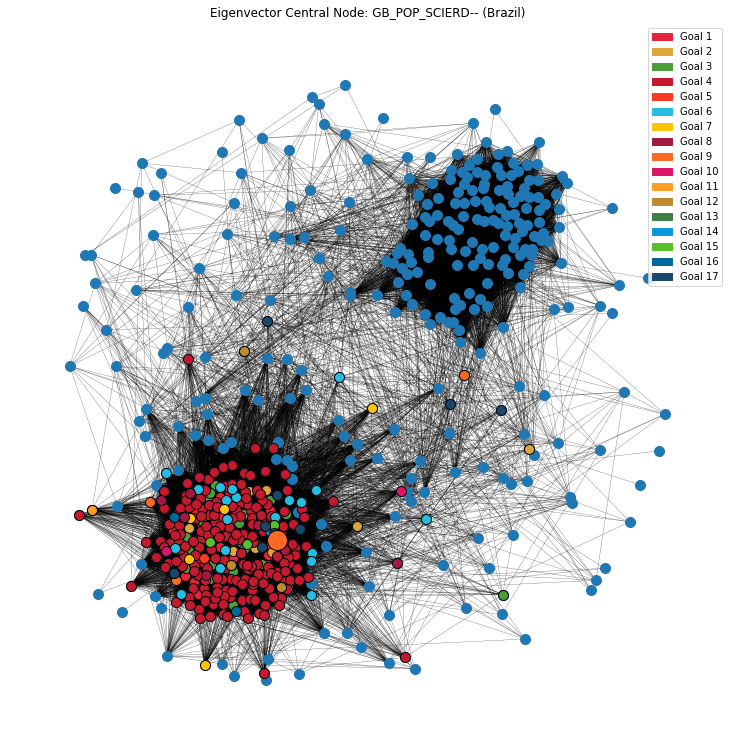

In [30]:
#Drawing network for key node with Actual UN classification for All Goals
plt.figure(1,figsize=(10,10))
#Draw base network with all nodes
nx.draw(G, posAll, edge_color='k',  with_labels=False,
         font_weight='light', node_size= 100, width= 0.2)
#Draw specific nodes from key node network colouring by goal 
nx.draw_networkx_nodes(SynNet, posAll, nodelist=SynNodes[0],node_size= 100, node_color=Goal1_colour).set_edgecolor('black')
nx.draw_networkx_nodes(SynNet, posAll, nodelist=SynNodes[1],node_size= 100, node_color=Goal2_colour).set_edgecolor('black')
nx.draw_networkx_nodes(SynNet, posAll, nodelist=SynNodes[2],node_size= 100, node_color=Goal3_colour).set_edgecolor('black')
nx.draw_networkx_nodes(SynNet, posAll, nodelist=SynNodes[3],node_size= 100, node_color=Goal4_colour).set_edgecolor('black')
nx.draw_networkx_nodes(SynNet, posAll, nodelist=SynNodes[4],node_size= 100, node_color=Goal5_colour).set_edgecolor('black')
nx.draw_networkx_nodes(SynNet, posAll, nodelist=SynNodes[5],node_size= 100, node_color=Goal6_colour).set_edgecolor('black')
nx.draw_networkx_nodes(SynNet, posAll, nodelist=SynNodes[6],node_size= 100, node_color=Goal7_colour).set_edgecolor('black')
nx.draw_networkx_nodes(SynNet, posAll, nodelist=SynNodes[7],node_size= 100, node_color=Goal8_colour).set_edgecolor('black')
nx.draw_networkx_nodes(SynNet, posAll, nodelist=SynNodes[8],node_size= 100, node_color=Goal9_colour).set_edgecolor('black')
nx.draw_networkx_nodes(SynNet, posAll, nodelist=SynNodes[9],node_size= 100, node_color=Goal10_colour).set_edgecolor('black')
nx.draw_networkx_nodes(SynNet, posAll, nodelist=SynNodes[10],node_size= 100, node_color=Goal11_colour).set_edgecolor('black')
nx.draw_networkx_nodes(SynNet, posAll, nodelist=SynNodes[11],node_size= 100, node_color=Goal12_colour).set_edgecolor('black')
nx.draw_networkx_nodes(SynNet, posAll, nodelist=SynNodes[12],node_size= 100, node_color=Goal13_colour).set_edgecolor('black')
nx.draw_networkx_nodes(SynNet, posAll, nodelist=SynNodes[13],node_size= 100, node_color=Goal14_colour).set_edgecolor('black')
nx.draw_networkx_nodes(SynNet, posAll, nodelist=SynNodes[14],node_size= 100, node_color=Goal15_colour).set_edgecolor('black')
nx.draw_networkx_nodes(SynNet, posAll, nodelist=SynNodes[15],node_size= 100, node_color=Goal16_colour).set_edgecolor('black')
nx.draw_networkx_nodes(SynNet, posAll, nodelist=SynNodes[16],node_size= 100, node_color=Goal17_colour).set_edgecolor('black')

#Want to highlight key node so create network with only that
labelNet=nx.Graph()
labelNet.add_node(inputNode)
#Draw network for key node with an increased size so it can be clearly seen
nx.draw_networkx_nodes(labelNet, posAll, nodelist=[inputNode],node_size=400, node_color=Goal9_colour).set_edgecolor('black')
plt.title('Eigenvector Central Node: '+inputNode +' (Brazil)')
#Plot legend for all
plt.legend(loc='upper right',handles=[Goal1_patch,Goal2_patch,Goal3_patch,Goal4_patch,Goal5_patch,Goal6_patch,Goal7_patch,Goal8_patch,Goal9_patch,Goal10_patch,Goal11_patch,Goal12_patch,Goal13_patch,Goal14_patch,Goal15_patch,Goal16_patch,Goal17_patch,])
plt.show()